# Problem Statement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
adult_data=pd.read_csv("Holiday_Package.csv")

### EDA

In [3]:
adult_data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


There are no missing values. 6 variables are numeric and remaining categorical. Categorical variables are not in encoded format

In [5]:
adult_data.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


### Checking the spread of the data using boxplot for the continuous variables.

Shape before Outliers Treatment (872, 8)


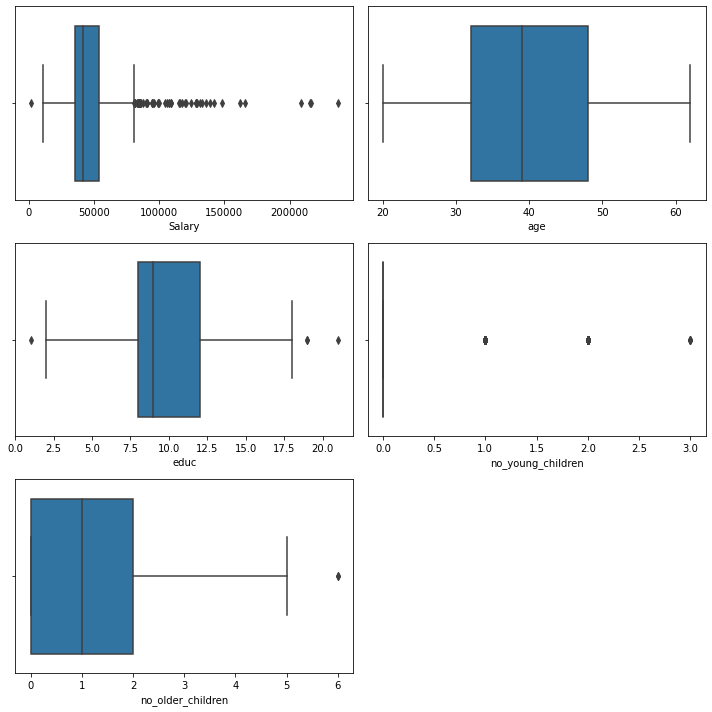

In [6]:
data_plot=adult_data[["Salary", "age", "educ", "no_young_children","no_older_children"]]
fig=plt.figure(figsize=(10,10))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',adult_data.shape)

### Treating the outliers.


In [7]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [8]:
lr,ur=remove_outlier(adult_data['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
adult_data['Salary']=np.where(adult_data['Salary']>ur,ur,adult_data['Salary'])
adult_data['Salary']=np.where(adult_data['Salary']<lr,lr,adult_data['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


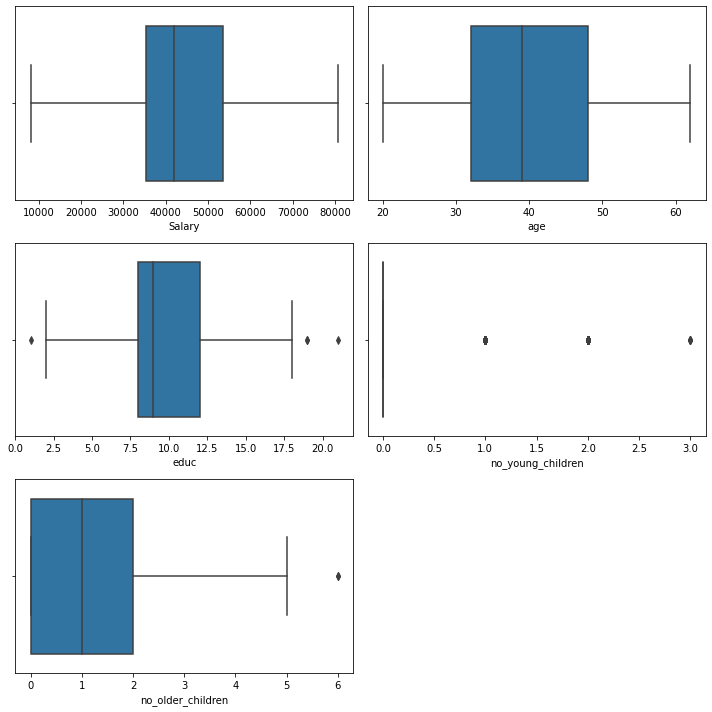

In [9]:
data_plot=adult_data[["Salary", "age", "educ", "no_young_children","no_older_children"]]
fig=plt.figure(figsize=(10,10))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

### Checking for Correlations.

In [10]:
adult_data.corr()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
Unnamed: 0,1.000000,-0.242135,-0.103782,-0.296015,0.052146,-0.025852
Salary,-0.242135,1.000000,0.047029,0.352726,-0.034360,0.121993
age,-0.103782,0.047029,1.000000,-0.149294,-0.519093,-0.116205
educ,-0.296015,0.352726,-0.149294,1.000000,0.098350,-0.036321
no_young_children,0.052146,-0.034360,-0.519093,0.098350,1.000000,-0.238428
no_older_children,-0.025852,0.121993,-0.116205,-0.036321,-0.238428,1.000000


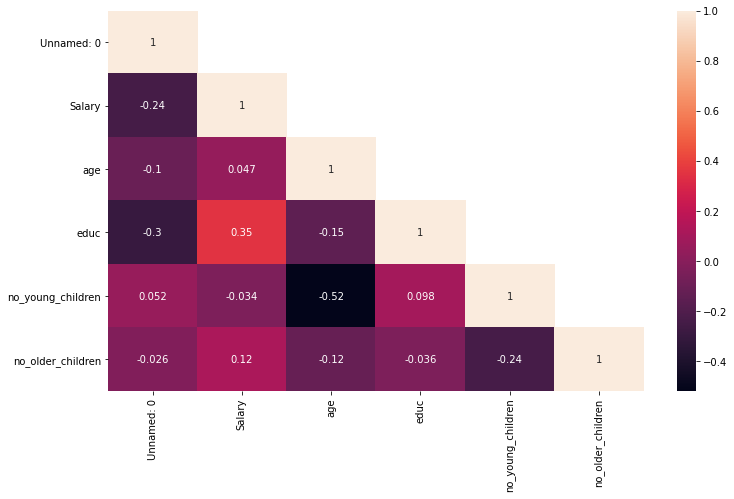

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(adult_data.corr(), annot=True,mask=np.triu(adult_data.corr(),+1));

In [12]:
adult_data.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,45608.336869,39.955275,9.307339,0.311927,0.982798
std,251.869014,15699.745151,10.551675,3.036259,0.612870,1.086786
min,1.000000,8105.750000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,80687.750000,62.000000,21.000000,3.000000,6.000000


There is hardly any correlation between the numeric variables

In [13]:
# Pairplot using sns
#sns.pairplot(adult_data ,diag_kind='hist');

### Converting all objects to categorical codes

In [14]:
for feature in adult_data.columns: 
    if adult_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(adult_data[feature].unique()))
        print(pd.Categorical(adult_data[feature].unique()).codes)
        adult_data[feature] = pd.Categorical(adult_data[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [15]:
adult_data.drop("Unnamed: 0", axis=1).head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


### Train Test Split

In [16]:
# Copy all the predictor variables into X dataframe
X = adult_data.drop(['Holliday_Package', "Unnamed: 0"], axis=1)

# Copy target into the y dataframe. 
y = adult_data['Holliday_Package']

In [17]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0
2,58022.0,46,9,0,0,0
3,66503.0,31,11,2,0,0
4,66734.0,44,12,0,2,0


In [18]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [19]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [20]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

### Logistic Regression Model

We are making some adjustments to the parameters in the Logistic Regression Class to get a better accuracy. Details of which can be found out on the site scikit-learn mentioned below

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>scikit-learn</a>

>Argument=solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

>For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

>For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

>‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

>‘liblinear’ and ‘saga’ also handle L1 penalty

>‘saga’ also supports ‘elasticnet’ penalty

>‘liblinear’ does not support setting penalty='none'

>Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

>New in version 0.17: Stochastic Average Gradient descent solver.

>New in version 0.19: SAGA solver.

>Changed in version 0.22: The default solver changed from ‘liblinear’ to ‘lbfgs’ in 0.22.

<a href='https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451'> Article on Solvers</a>



In [21]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear',max_iter=100000,penalty='l1',verbose=True,n_jobs=2)
model.fit(X_train, y_train)



[LibLinear]

C:\Users\Rachit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear',
                   verbose=True)

### Predicting on Training and Test dataset

In [22]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [23]:
ytest_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

### Getting the Predicted Classes and Probs

In [24]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.671044,0.328956
1,0.560206,0.439794
2,0.684654,0.315346
3,0.508215,0.491785
4,0.560356,0.439644


## Model Evaluation

In [25]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6639344262295082

### AUC and ROC for the training data

AUC: 0.733


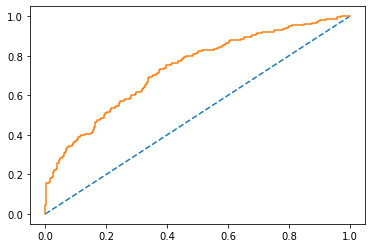

In [26]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [27]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6564885496183206

### AUC and ROC for the test data

AUC: 0.733


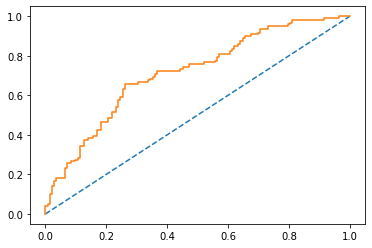

In [28]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [29]:
confusion_matrix(y_train, ytrain_predict)

array([[245,  84],
       [121, 160]], dtype=int64)

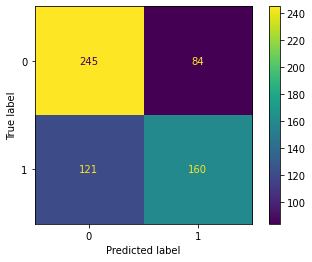

In [30]:
plot_confusion_matrix(model,X_train,y_train);

In [31]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



### Confusion Matrix for test data

In [32]:
confusion_matrix(y_test, ytest_predict)

array([[110,  32],
       [ 58,  62]], dtype=int64)

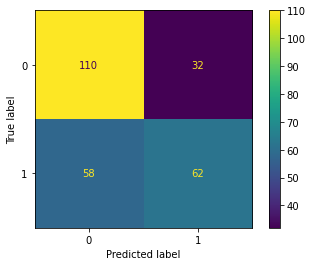

In [33]:
plot_confusion_matrix(model,X_test,y_test);

In [34]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.66      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262



## Applying GridSearchCV for Logistic Regression

In [35]:
grid={'penalty':['elasticnet','l2','none','l1'],
      'solver':['newton-cg','liblinear'],
      'tol':[0.0001,0.00001,0.000001],
      'verbose':[True, False]
      }

In [36]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [37]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 10,n_jobs=-1,scoring='f1')

In [38]:
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['elasticnet', 'l2', 'none', 'l1'],
                         'solver': ['newton-cg', 'liblinear'],
                         'tol': [0.0001, 1e-05, 1e-06],
                         'verbose': [True, False]},
             scoring='f1')

In [39]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': True} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg', verbose=True)


In [40]:
best_model = grid_search.best_estimator_

In [41]:
# Fit the Logistic Regression model

model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [42]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [43]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.672166,0.327834
1,0.529350,0.470650
2,0.686277,0.313723
3,0.481848,0.518152
4,0.567935,0.432065


              precision    recall  f1-score   support

           0       0.68      0.75      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610
 



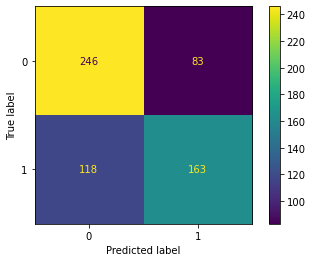

In [44]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.53      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



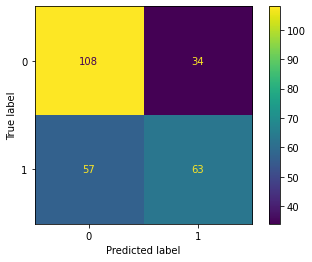

In [45]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [46]:
# Training Data Probability Prediction
y_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
y_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.733
AUC for the Test Data: 0.715


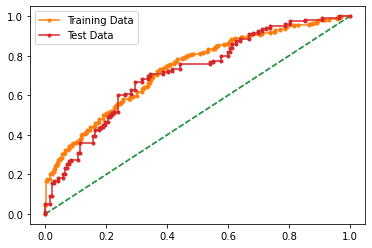

In [47]:
#calculate AUC
auc = metrics.roc_auc_score(y_train,y_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,y_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()